# Логистическая регрессия

Работа выполнена студентом группы 23КНТ2 ИМИКН ВШЭ НН ***Власовым Артёмом Дмитриевичем*** в рамках майнора "Интеллектуальные системы управления и обработки информации в медицине"

## Имплементация


Алгоритм логистической регрессии работает путем реализации линейного уравнения с независимыми или объясняющими переменными для прогнозирования значения ответа. Например, мы рассмотрим пример количества изученных часов и вероятности сдачи экзамена. Здесь количество изученных часов является объяснительной переменной, и она обозначена $x_1$. Вероятность сдачи экзамена является переменной ответа или целевой, и она обозначена $z$.


Если у нас есть одна объяснительная переменная $x_1$ и одна переменная ответа $z$, то линейное уравнение будет предоставлено математически со следующим уравнением:

 $z = β_0 + β_1x_1$

Здесь коэффициенты $β_0$ и $β_1$ являются параметрами модели.


Если есть несколько объяснительных переменных, то вышеуказанное уравнение может быть расширено на

$z = β_0+ β_1x_1+ β_2x_2+ ... + β_nx_n$

Здесь коэффициенты $β_0, β_1, β_2, ...$ и $β_N$ являются параметрами модели.

## Сигмоида

Формула сигмоиды: $σ(x) = \dfrac{1}{1 + e^{-x}}$

Это прогнозируемое значение ответа, обозначаемое $z$, с помощью сигмоиды преобразуется в значение вероятности, которое лежит между 0 и 1.

В машинном обучении сигмоида используется для перевода прогнозов в вероятности. Сигмоида имеет кривую в форме S. Это также называется сигмоидальной кривой.

Сигмоида - это особый случай логистической функции. Это дано следующей математической формулой.

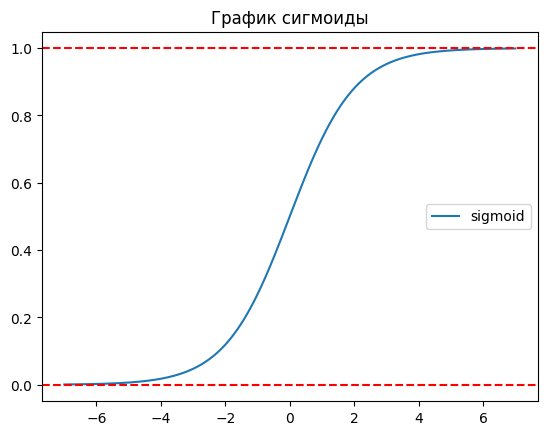

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.linspace(-7, 7, 100000)
plt.plot(x, sigmoid(x), label='sigmoid')
plt.axhline(y=0, linestyle='--', color='r')
plt.axhline(y=1, linestyle='--', color='r')
plt.legend()
plt.title('График сигмоиды');

## Пороговое значение

Сигмоида возвращает значение вероятности от 0 до 1. Это значение вероятности затем отображается с дискретным классом, который является либо «0», либо «1». Чтобы отобразить это значение вероятности с дискретным классом , мы выбираем пороговое значение. Выше этого порогового значения мы сопоставляем значения вероятности в класс 1 и ниже, которые мы сопоставляем значения в класс 0.

Математически это может быть выражено следующим образом:-

$p \geqslant 0,5 =>$ класс = 1

$p < 0.5 =>$ класс = 0

Как правило, граница принятия решений установлена ​​на 0,5.

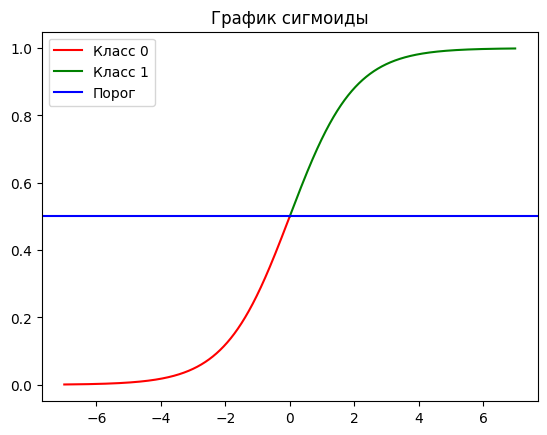

In [ ]:
x = np.linspace(-7, 7, 100000)
plt.plot(x[:50000], sigmoid(x[:50000]), label='Класс 0', color='r')
plt.plot(x[50000:], sigmoid(x[50000:]), label='Класс 1', color='g')
plt.axhline(y=0.5, color='b', label='Порог')
plt.legend()
plt.title('График сигмоиды');

## Предположения логистической регрессии


Модель логистической регрессии требует нескольких ключевых предположений:

1. Зависимая переменная должна быть бинарной, обычно её кодируют как ноль и один (но можно и решать задачу многоклассовой классификации)

2. Независимость наблюдений друг от друга

3. Отсутствие мультиколлинеарности

4. Достаточный размер выборки (хотя бы тридцать наблюдений)

5. Отсутствие выбросов.

## Импортируем датасет

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


**Задание 1**
Удалите столбец, который явно не несет информации об объекте. В качестве ответа запишите в переменную useless_col название этой колонки.

**Пояснение**: Это столбец 'id', поскольку не несёт никакой характеристической информации об обьекте



In [ ]:
answer_lst = []
useless_col = 'id'

answer_lst.append(useless_col)

In [ ]:
df = df.drop(useless_col, axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Типы признаков

Поработаем отдельно с числовыми и категориальными признаками

## Категориальные признаки


Категориальными признаками мы называем такие признаки, множество значений которых конечно (делится на разные категории).

**Задание 2** Составьте список категориальных переменных и запишите в переменную categorical (целевую переменную не записывайте)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None


**Пояснение**: Выбираем те столбцы, в которых записаны значения типа object или бинарного типа, т.е. либо 0 либо 1.

In [ ]:
categorical = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status',
                  'hypertension', 'heart_disease']

answer_lst.append(categorical)

### Частота категорий в категориальных признаках


Посмотрим как часто встречается каждая категория во всех категориальных признаках

In [ ]:
for col in categorical:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Value counts for ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Value counts for work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Value counts for Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Value counts for smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

Value counts for hypertension:
hypertension
0    4612
1     498
Name: count, dtype: int64

Value counts for heart_disease:
heart_disease
0    4834
1     276
Name: count, dtype: int64


In [ ]:
df[categorical].value_counts()

gender  ever_married  work_type      Residence_type  smoking_status   hypertension  heart_disease
Female  Yes           Private        Urban           never smoked     0             0                237
                                     Rural           never smoked     0             0                221
Male    No            children       Urban           Unknown          0             0                171
                                     Rural           Unknown          0             0                154
Female  No            children       Rural           Unknown          0             0                153
                                                                                                    ... 
                      Private        Urban           Unknown          1             0                  1
                                     Rural           formerly smoked  1             1                  1
                                                                      0             1                  1
Male    Yes           Self-employed  Rural           Unknown          1             1                  1
Other   No            Private        Rural           formerly smoked  0             0                  1
Name: count, Length: 281, dtype: int64

### Количество меток

Посмотрим сколько различных значений встречается в каждом категориальном признаке

In [ ]:
for col in categorical:
    print(f"\nNumber of unique values in {col}: {df[col].nunique()}")


Number of unique values in gender: 3

Number of unique values in ever_married: 2

Number of unique values in work_type: 5

Number of unique values in Residence_type: 2

Number of unique values in smoking_status: 4

Number of unique values in hypertension: 2

Number of unique values in heart_disease: 2


### Пропуски

Проверим пропуски в категориальных признаках

In [ ]:
df[categorical].isna().sum()

,0
gender,0
ever_married,0
work_type,0
Residence_type,0
smoking_status,0
hypertension,0
heart_disease,0


In [ ]:
print(df[categorical].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          5110 non-null   object
 1   ever_married    5110 non-null   object
 2   work_type       5110 non-null   object
 3   Residence_type  5110 non-null   object
 4   smoking_status  5110 non-null   object
 5   hypertension    5110 non-null   int64 
 6   heart_disease   5110 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 279.6+ KB
None


**Задание 3** Запишите в переменную categorical_nans количество пропусков в категориальных признаках.

**Пояснение**: Из результата кода

```
print(df[categorical].info())
```

становится понятно, что пропусков в таблице совсем нет и ответом на 3 задание будет ноль.



In [ ]:
categorical_nans = df[categorical].isna().sum().sum()

answer_lst.append(categorical_nans)

In [ ]:
categorical_nans

np.int64(0)

### Заполним пропуски

При наличии пропусков заполните их самым частым значением в столбце.

**Пояснение**: пропусков нет

### Делаем One-Hot Encoding

С drop_first=True

In [ ]:
df = pd.get_dummies(df, columns=categorical, drop_first=True)

**Задание 4** Введите количество столбцов нового датасета в переменную encoded_n_columns

In [ ]:
encoded_n_columns = df.shape[1]
print(encoded_n_columns)
answer_lst.append(encoded_n_columns)

17


## Числовые признаки

Числовыми признаками называем все признаки, множество значение которых $\in \mathbb{R}$ и не конечно.

In [ ]:
df.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_1,heart_disease_1
0,67.0,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False,False,True
1,61.0,202.21,NaN,1,False,False,True,False,False,True,False,False,False,True,False,False,False
2,80.0,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False,False,True
3,49.0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True,False,False
4,79.0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False,True,False


**Задание 5**

В переменную numerical введите все числовые переменные (целевую не записывайте)

**Пояснение**: Запишем оставшиеся признаки, ведь они как раз представляют собой столбцы с числовыми переменными

In [ ]:
numerical = ['bmi', 'avg_glucose_level', 'age']

answer_lst.append(numerical)

### Пропуски

Проверим пропуски в числовых признаках

In [ ]:
print("Пропуски в числовых признаках:")
print(df[numerical].isna().sum())

Пропуски в числовых признаках:
bmi                  201
avg_glucose_level      0
age                    0
dtype: int64


**Задание 6** Введите количество пропусков в числовых признаках в переменную numerical_nans

In [ ]:
numerical_nans = df[numerical].isna().sum().sum()
print(numerical_nans)
answer_lst.append(numerical_nans)

201


### Заполним пропуски

При наличии пропусков заполните пропуски в столбцах *медианой* по столбцу (можно заполнять и средним, но медиана более устойчивая статистика)

In [ ]:
for col in numerical:
    if df[col].isna().sum() > 0:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

In [ ]:
df[numerical].isna().sum().sum()

np.int64(0)

**Задание 7** Введите в переменную mean_bmi среднее значение по столбцу bmi с учетом заполненных пропусков

In [ ]:
mean_bmi = df['bmi'].mean()
print(mean_bmi)
answer_lst.append(mean_bmi)

28.862035225048924


### Распределение численных величин

Изобразите распределение числовых величин

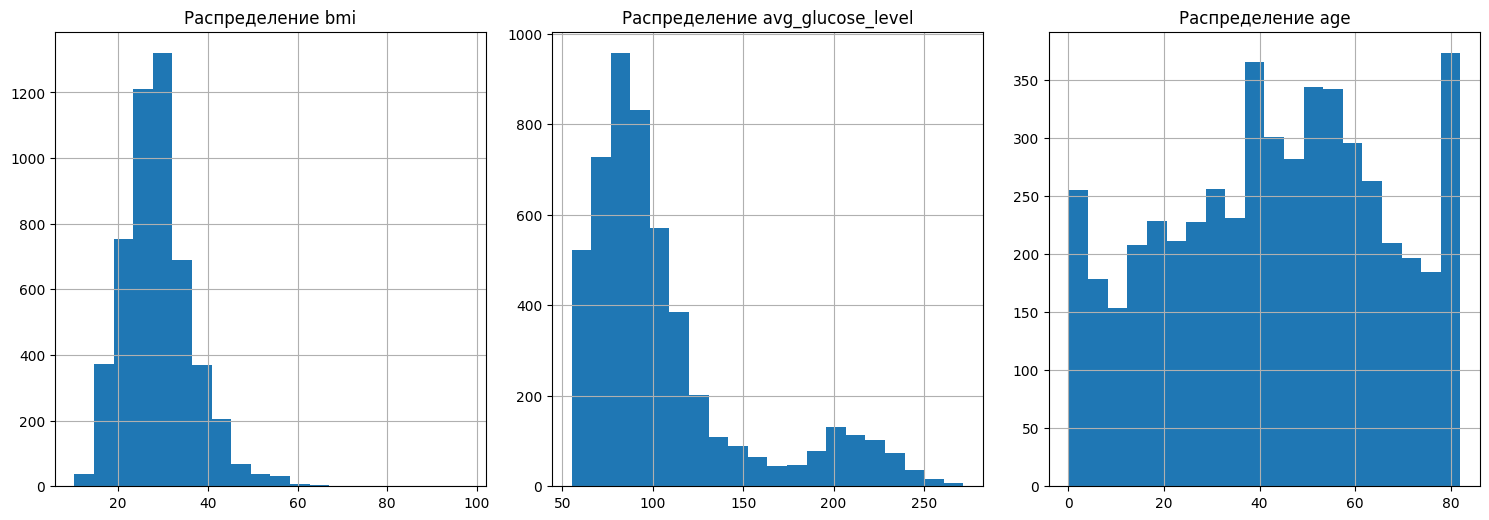

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(2, 3, i)
    df[col].hist(bins=20)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

## Моделирование

Разделим датасет на матрицу признаков и таргет

In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']

Посмотрим на распределение таргета

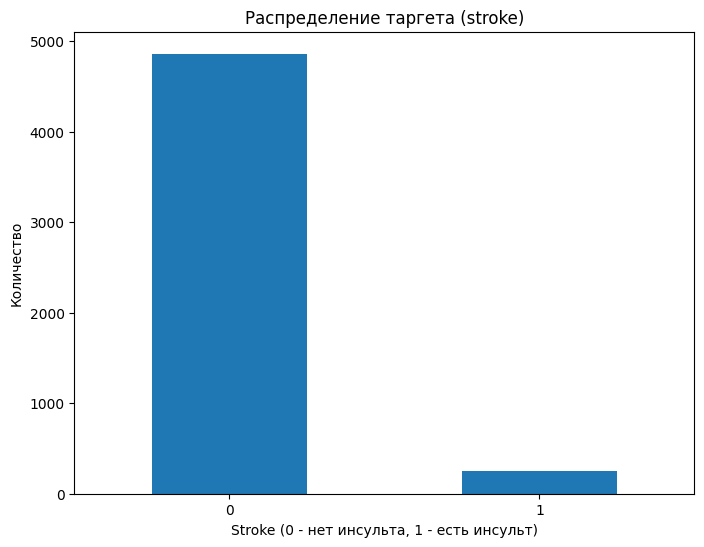

In [ ]:
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar')
plt.title('Распределение таргета (stroke)')
plt.xlabel('Stroke (0 - нет инсульта, 1 - есть инсульт)')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

Разделим данные на train и test (test_size=0.2, random_state=42)

Также установите параметр stratify=y (он разделяет данные так, чтоб объекты разных классов сохраняли свои пропорции в трейне и в тесте, то есть, если во всех данных 5% одного класса и 95% другого, то после разделения, в трейне будет 5% положительного класса среди всего трейна и в тесте будет 5% от всех данных теста), так как в таблице очень мало объектов положительного класса, и может произойти так, что в тренировочную выборку практически не попадут (или вообще не попадут) объекты положительного класса и модель обучится плохо. Также это хорошо для модели, потому что мы создаем ситуацию, что в данных, на которых модель обучалась (train) и в данных, на которых модель будет применяться (test), пропрция класса сохраняется.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Проверьте пропорции классов в исходном X, X_train и X_test

In [ ]:
print(f'Процент класса 1 в y равен {y.value_counts(normalize=True)[1] * 100}')
print(f'Процент класса 1 в y_train равен {y_train.value_counts(normalize=True)[1] * 100}')
print(f'Процент класса 1 в y_test равен {y_test.value_counts(normalize=True)[1] * 100}')

Процент класса 1 в y равен 4.87279843444227
Процент класса 1 в y_train равен 4.867906066536203
Процент класса 1 в y_test равен 4.892367906066536


**Задание 8** В переменную class_1_percent введите процент класса 1 в исходных данных округленный до целого числа

In [ ]:
class_1_percent = round(y.value_counts(normalize=True)[1] * 100)

answer_lst.append(class_1_percent)

In [ ]:
class_1_percent

5

### Стандартизация численных признаков

Не забудем стандартизировать численные признаки (с помощью StandardScaler)

Обучаем скалер на X_train, применяем на X_test

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

Все готово! Можно приступать к обучение модели логистической регрессии.

Обучите логистическую регрессию с дефольтными параметрами.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

Посчитайте accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print(f'accuracy = {accuracy_score(y_test, y_pred)}')

accuracy = 0.952054794520548


Обычно метрика accuracy одна из первых приходит в голову для оценивания качества модели, ее легко считать и интерпретировать. Но в задачах с сильным дисбалансом классов, который практически всегда присутствует в медицине, высокий accuracy должен немного настораживать.

Давайте представим, что у нас есть модель a(x), которая всем объектам выдает класс 0, посчитайте ее accuracy

In [ ]:
y_pred_a_x = pd.Series([0] * len(y_test), index=y_test.index)
print(f"Accuracy модели a(x): {accuracy_score(y_test, y_pred_a_x)}")

Accuracy модели a(x): 0.9510763209393346


Как видим accuracy, практически такой же, но вторая модель вообще не понимает ничего про наши данные и не знает никаких зависимостей между признаками и таргетом. Поэтому посчитаем еще другие метрики.

Посчитаем следующие метрики:
1. **Precision (точность)** - доля объектов положительного класса, среди всех объектов, которые модель отнесла к положительному классу
2. **Recall (полнота)** - доля объектов положительного класса, которые модель отнесла к положительному классу.
3. **ROC-AUC** - сложно-интерпретируемая метрика, которая в отличии от предыдущих двух не зависит от порога классификации, и помогает сразу понять, подходит ли модель вообще к задаче.
4. **F-1 score** - метрика для сравнения моделей между собой.


In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score

Посчитайте эти три метрики для логрега и для модели, которая всем объектам выдает класс 0

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
precision  = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
print(precision, recall, roc_auc, f1)

1.0 0.02 0.8419547325102881 0.0392156862745098


In [ ]:
# для модели, которая всем объектам выдает класс 0
precision_a_x  = precision_score(y_test, y_pred_a_x)
recall_a_x = recall_score(y_test, y_pred_a_x)
roc_auc_a_x = roc_auc_score(y_test, y_pred_a_x)
f1_a_x = f1_score(y_test, y_pred_a_x)
print(precision_a_x, recall_a_x, roc_auc_a_x, f1_a_x)

0.0 0.0 0.5 0.0


**Задание 9** Введите в переменную roc_auc_0 значение roc_auc для модели выдающей всем объектам класс 0.

In [ ]:
roc_auc_0 = roc_auc_score(y_test, y_pred_a_x)

answer_lst.append(roc_auc_0)

Тут уже видим, что первая модель получше второй (что логично), но в целом к первой модели есть вопросы. А именно - precision = 1. Слишком подозрительно, то есть модель выдала класс 1 на 100% верно.

Давайте проверим, скольким объектам модель выдала класс 1 и сколько всего объектов 1 в тесте.

In [ ]:
predicted_class_1 = (y_pred == 1).sum()
true_class_1 = (y_test == 1).sum()

In [ ]:
print(f"predicted_class_1: {predicted_class_1}")
print(f"true_class_1: {true_class_1}")

predicted_class_1: 1
true_class_1: 50


**Задание 10** Введите в переменную class_1_predicted количество объектов, которые логрег классифицировал в класс 1

In [ ]:
class_1_predicted = predicted_class_1

answer_lst.append(class_1_predicted)

Теперь понятно, почему precision равен 1, потому что модель очень мало объектов классифицировала в положительный класс.

В медицине при использовании моделей в ход идет один очень важный гиперпараметр, с помощью которого хорошо можно решать проблему дисбаланса классов.

**Введение:** модель когда обучается, она минимизирует некоторую функцию потерь, в которой по дефолту все объекты имеют одинаковый вклад. Но у нас ситуация другая, в медицине более предпочтительным классом является класс 1, и даже не так страшно ошибиться на классе 0 (лучше сказать человеку, что он болен какой-то болезнью, а потом выяснится, что не болен. Чем сказать, что он не болен, а на самом деле окажется, что он болен). Поэтому в моделях есть гиперпараметр class_weight или вес класса, то есть с каким весом мы учитываем объект конкретного класса в функцию потерь. Если у класса 1 будет стоять вес 100, а у класса 0 вес 1, то модели будет равносильно:
1. Правильно классифицировать один объект класса 1 и ошибиться на 100 объектах класса 1
2. Правильно классифицировать 100 объектов класса 0 и ошибиться на одном объекте класса 1

Поэтому она будет пытаться хорошо предсказывать класс 1 и чуть хуже предсказывать класс 0.

Если говорить в контексте метрик, нам важнее recall - захватить как можно больше объектов класса 1, а точность не так важна, потому что получится модель как в предыдущем пункте, которая классифицировала пару человек в класс 1, и почти всех остальных из класса 1 не угадала.

Обучите модель логрега с class_weight = {1:n, 0:1} где n будет от (1 до 200) и посчитайте все метрики из предыдущих пунктов. Далее постройте на одном графике все метрики.

In [ ]:
from tqdm import tqdm

In [ ]:
n_values = np.arange(1, 201)
accuracies = []
precisions = []
recalls = []
roc_aucs = []
f1_scores = []

for n in tqdm(n_values):
    class_weight = {1: n, 0: 1}
    model = LogisticRegression(class_weight=class_weight, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, y_pred_proba))
    f1_scores.append(f1_score(y_test, y_pred))

100%|██████████| 200/200 [00:06<00:00, 31.32it/s]


### График метрик

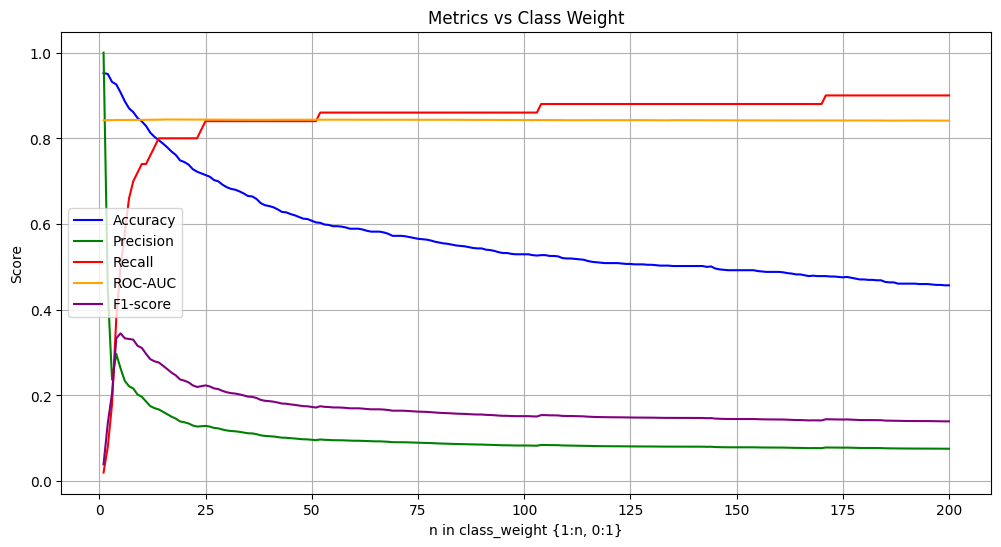

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(n_values, accuracies, label='Accuracy', color='blue')
plt.plot(n_values, precisions, label='Precision', color='green')
plt.plot(n_values, recalls, label='Recall', color='red')
plt.plot(n_values, roc_aucs, label='ROC-AUC', color='orange')
plt.plot(n_values, f1_scores, label='F1-score', color='purple')
plt.xlabel('n in class_weight {1:n, 0:1}')
plt.ylabel('Score')
plt.title('Metrics vs Class Weight')
plt.legend()
plt.grid(True)
plt.show()

Выберем лучшую модель с точки зрения f1_score.

**Задание 11** В переменную best_n_f1_score введите лучший вес для класса 1 с точки зрения f1_score

In [ ]:
best_n_f1_score = n_values[np.argmax(f1_scores)]
print(best_n_f1_score)
answer_lst.append(best_n_f1_score)

5


**Задание 12** В переменную best_n_roc_auc введите лучший вес для класса 1 с точки зрения roc_auc

In [ ]:
best_n_roc_auc = n_values[np.argmax(roc_aucs)]
print(best_n_roc_auc)
answer_lst.append(best_n_roc_auc)

16


Обучите логрег с лучшим весом для класса 1 по f1_score и по roc_auc и посчитайте все метрики.

In [ ]:
def print_metrics(y_test, y_pred, y_pred_proba, title):
    """Функция для подсчёта и вывода всех необходимых метрик сразу"""
    print(f"\n{title}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}")

In [ ]:
# Модель с лучшим весом для F1-score
model_f1 = LogisticRegression(class_weight={1: best_n_f1_score, 0: 1}, random_state=42)
model_f1.fit(X_train, y_train)
y_pred_f1 = model_f1.predict(X_test)
y_pred_proba_f1 = model_f1.predict_proba(X_test)[:, 1]
print_metrics(y_test, y_pred_f1, y_pred_proba_f1, f"Metrics for best_n_f1_score ({best_n_f1_score})")


Metrics for best_n_f1_score (5):
Accuracy: 0.907
Precision: 0.263
Recall: 0.500
ROC-AUC: 0.843
F1-score: 0.345


In [ ]:
# Модель с лучшим весом для ROC-AUC
model_roc = LogisticRegression(class_weight={1: best_n_roc_auc, 0: 1}, random_state=42)
model_roc.fit(X_train, y_train)
y_pred_roc = model_roc.predict(X_test)
y_pred_proba_roc = model_roc.predict_proba(X_test)[:, 1]
print_metrics(y_test, y_pred_roc, y_pred_proba_roc, f"Metrics for best_n_roc_auc ({best_n_roc_auc})")


Metrics for best_n_roc_auc (16):
Accuracy: 0.779
Precision: 0.156
Recall: 0.800
ROC-AUC: 0.844
F1-score: 0.261


**Итог** f1_score ищет золотую середину по качеству для precision и recall одновременно, однако у нас предпочтение к recall, поэтому лучше модель с точки зрения roc_auc.

## Оценка


Проверьте:

1. Первое значение в answer_lst имеет тип str
2. Второе и четвертое значение в answer_lst имеют тип list

In [ ]:
def grade(answer):
    res = 0

    if answer[0] == 'id':
        temp = 1
        res += temp
        print(f'За задание 1     {temp} / 1')
    else:
        print(f'За задание 10     0 / 1')
        print('Ошибка в 1 задании')

    set_1 = set(['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status',
                  'hypertension', 'heart_disease'])

    temp = len(set_1 & set(answer[1])) / len(set_1 | set(answer[1]))
    res += temp
    print(f'За задание 2     {int(temp)} / 1')
    if temp != 1:
        print(f'Ошибка во втором задании')

    if answer[2] == 0:
        temp = 1
        res += temp
        print(f'За задание 3     {temp} / 1')
    else:
        print(f'За задание 10     0 / 1')
        print('Ошибка в 3 задании')

    if answer[3] == 17:
        temp = 1
        res += temp
        print(f'За задание 4     {temp} / 1')
    else:
        print(f'За задание 10     0 / 1')
        print('Ошибка в 4 задании')

    set_2 = set(['bmi', 'avg_glucose_level', 'age'])
    temp = len(set_2 & set(answer[4])) / len(set_2 | set(answer[4]))
    res += temp
    print(f'За задание 5     {int(temp)} / 1')
    if temp != 1:
        print('Ошибка в 5 задании')

    if answer[5] == 201:
        temp = 1
        res += temp
        print(f'За задание 6     {temp} / 1')
    else:
        print(f'За задание 10     0 / 1')
        print('Ошибка в 6 задании')

    if abs(float(answer[6]) - 28.862035225048924) < 0.01:
        temp = 1
        res += temp
        print(f'За задание 7     {temp} / 1')
    else:
        print('За задание 7     0 / 1')
        print('Ошибка в задании 7')

    if answer[7] == 5:
        temp = 1
        res += temp
        print(f'За задание 8     {temp} / 1')
    else:
        print(f'За задание 8     0 / 1')
        print('Ошибка в 8 задании')

    if answer[8] == 0.5:
        temp = 1
        res += temp
        print(f'За задание 9     {temp} / 1')
    else:
        print(f'За задание 9     0 / 1')
        print('Ошибка в 9 задании')

    if answer[9] == 1:
        temp = 1
        res += temp
        print(f'За задание 10     {temp} / 1')
    else:
        print(f'За задание 10     0 / 1')
        print('Ошибка в 10 задании')

    if answer[10] == 4:
        temp = 1
        res += temp
        print(f'За задание 11     {temp} / 1')
    else:
        print(f'За задание 11     0 / 1')
        print('Ошибка в 11 задании')

    if answer[11] == 13:
        temp = 1
        res += temp
        print(f'За задание 12     {temp} / 1')
    else:
        print(f'За задание 12     0 / 1')
        print('Ошибка в 12 задании')

    print()
    print()
    print()
    print(f'ИТОГОВАЯ ОЦЕНКА ЗА ДЗ {res / 12 * 10}')


In [ ]:
grade(answer_lst)

За задание 1     1 / 1
За задание 2     1 / 1
За задание 3     1 / 1
За задание 4     1 / 1
За задание 5     1 / 1
За задание 6     1 / 1
За задание 7     1 / 1
За задание 8     1 / 1
За задание 9     1 / 1
За задание 10     1 / 1
За задание 11     0 / 1
Ошибка в 11 задании
За задание 12     0 / 1
Ошибка в 12 задании



ИТОГОВАЯ ОЦЕНКА ЗА ДЗ 8.333333333333334
